# Optional Lab - Multi-class Classification


## 1.1 Goals
이 실습에서는 신경망을 사용한 다중 클래스 분류의 예를 살펴보겠습니다.
<figure>
 <img src="./images/C2_W2_mclass_header.png"   style="width500px;height:200px;">
</figure>


## 1.2 Tools
몇 가지 플로팅 루틴을 사용하게 됩니다. 이는 이 디렉터리의 `lab_utils_multiclass_TF.py`에 저장되어 있습니다.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# 2.0 Multi-class Classification
신경망은 데이터를 분류하는 데 자주 사용됩니다. 예를 들면 신경망으로 :
- 사진을 찍고 사진 속 피사체를 {개, 고양이, 말, 기타}로 분류합니다.
- 문장을 선택하고 해당 요소의 '품사'를 분류합니다: {명사, 동사, 형용사 등..}

이 유형의 네트워크는 최종 계층에 여러 유닛을 갖습니다. 각 출력은 카테고리와 연관되어 있습니다. 입력 예시를 네트워크에 적용하면 가장 높은 값을 갖는 출력이 예측된 카테고리입니다. 출력이 소프트맥스 함수에 적용되는 경우 소프트맥스의 출력은 입력이 각 범주에 있을 확률을 제공합니다.

이 실습에서는 Tensorflow에서 다중 클래스 네트워크를 구축하는 예를 볼 수 있습니다. 그런 다음 신경망이 어떻게 예측을 하는지 살펴보겠습니다.

4가지 클래스로 구성된 데이터 세트를 만드는 것부터 시작해 보겠습니다.

## 2.1 Prepare and visualize our data
Scikit-Learn `make_blobs` 함수를 사용하여 아래 플롯에 표시된 대로 4개 범주로 구성된 훈련 데이터 세트를 만듭니다.

In [12]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

/Users/junji/Notebooks/Machine_Learning 2022/C2 Advanced Learning Algorithms /C2-W2-Neural_Network_Training/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


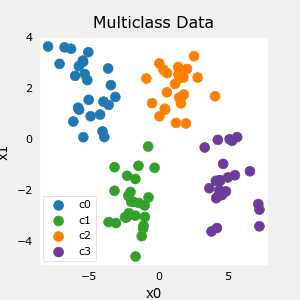

In [13]:
plt_mc(X_train,y_train,classes, centers, std=std)

각 점은 훈련 예시를 나타냅니다. 축 (x0,x1)은 입력이고 색상은 예제와 연관된 클래스를 나타냅니다. 훈련을 마치면 모델에 새로운 예(x0,x1)가 표시되고 클래스를 예측합니다.

생성되는 동안 이 데이터 세트는 실제 분류 문제를 대표합니다. 여러 입력 특징들 (x0,...,xn)과 여러 출력 범주가 있습니다. 모델은 입력 특징을 사용하여 올바른 출력 범주를 예측하도록 훈련되었습니다.

In [14]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


## 2.2 Model
<img align="Right" src="./images/C2_W2_mclass_lab_network.PNG"  style=" width:350px; padding: 10px 20px ; ">
이 실습에서는 그림과 같이 2-층 네트워크를 사용합니다.
이진 분류 네트워크와 달리 이 네트워크에는 각 클래스에 하나씩 총 4개의 출력이 있습니다. 입력 예가 주어지면 가장 높은 값을 갖는 출력이 입력의 예측 클래스입니다.

다음은 Tensorflow에서 이 네트워크를 구성하는 방법의 예입니다. 출력 레이어는 `softmax` 활성화 대신 `선형`을 사용합니다. 출력 레이어에 소프트맥스를 포함하는 것이 가능하지만 훈련 중에 선형 출력이 손실 함수에 전달되면 수치적으로 더 안정적입니다. 모델을 사용하여 확률을 예측하는 경우 해당 시점에 소프트맥스를 적용할 수 있습니다.

In [15]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2")
    ]
)

아래 명령문은 네트워크를 컴파일하고 훈련시킵니다. 손실 함수에 대한 인수로 `from_logits=True`를 설정하면 출력 활성화가 소프트맥스가 아닌 선형임을 지정합니다.

In [16]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200


2023-09-16 17:48:53.150676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 10ms/step - loss: 2.7984
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 2.5656
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 2.3671
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 2.2076
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 2.0465
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 1.9034
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 1.7604
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 1.6235
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 1.4975
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 1.3781
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 1.2660
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 1.1632
Epoch 13/200
4/4 [==============================] - 0s 4ms/step - loss: 

모델을 훈련시키면 모델이 훈련 데이터를 어떻게 분류했는지 확인할 수 있습니다.

 86/184 [=============>................] - ETA: 0s

2023-09-16 17:45:27.072728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


184/184 [==============================] - 0s 1ms/step


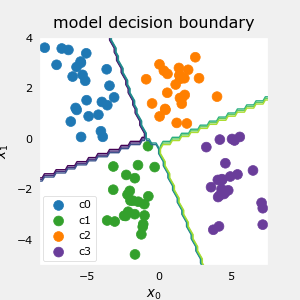

In [7]:
plt_cat_mc(X_train, y_train, model, classes)

위의 결정 경계는 모델이 입력 공간을 어떻게 분할했는지 보여줍니다. 이 매우 간단한 모델은 훈련 데이터를 분류하는 데 아무런 문제가 없었습니다. 어떻게 이를 달성했나요? 네트워크를 좀 더 자세히 살펴보겠습니다.

아래에서는 모델에서 훈련된 가중치를 가져와 이를 사용하여 각 네트워크 유닛의 함수를 플롯합니다. 아래에는 결과에 대한 자세한 설명이 있습니다. 신경망을 성공적으로 사용하기 위해 이러한 세부 사항을 알 필요는 없지만 분류 문제를 해결하기 위해 레이어가 결합되는 방식에 대해 더 많은 직관을 얻는 것이 도움이 될 수 있습니다.

In [17]:
# gather the trained parameters from the first layer
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()

/Users/junji/Notebooks/Machine_Learning 2022/C2 Advanced Learning Algorithms /C2-W2-Neural_Network_Training/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/junji/Notebooks/Machine_Learning 2022/C2 Advanced Learning Algorithms /C2-W2-Neural_Network_Training/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


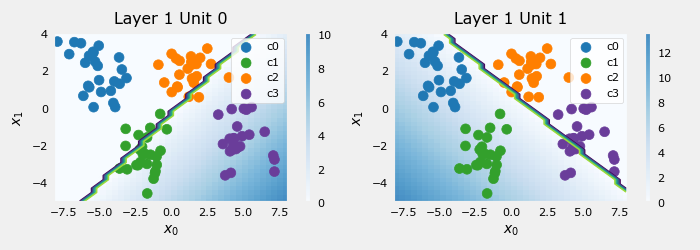

In [18]:
# plot the function of the first layer
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

/Users/junji/Notebooks/Machine_Learning 2022/C2 Advanced Learning Algorithms /C2-W2-Neural_Network_Training/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/junji/Notebooks/Machine_Learning 2022/C2 Advanced Learning Algorithms /C2-W2-Neural_Network_Training/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/junji/Notebooks/Machine_Learning 2022/C2 Advanced Learning Algorithms /C2-W2-Neural_Network_Training/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/junji/Notebooks/Machine_Learning 2022/C2 Advanced Learning Algorithms /C2-W2-Neural_Network_Training/lab_utils_multiclass_TF.py:63: UserWarning:

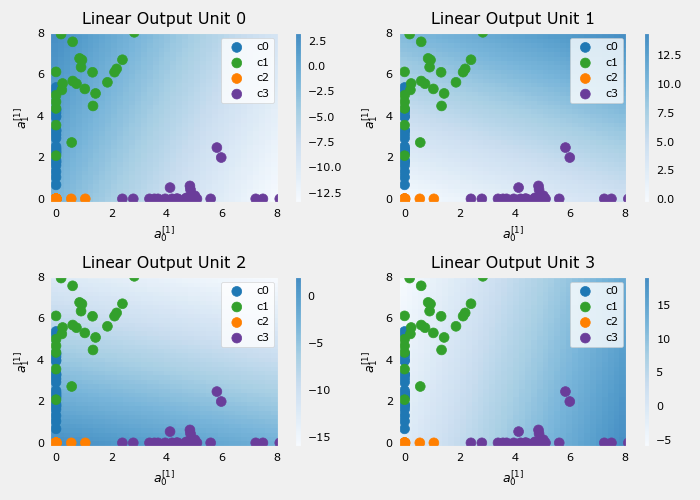

In [19]:
# gather the trained parameters from the output layer
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()
# create the 'new features', the training examples after L1 transformation
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))

## Explanation
#### Layer 1 <img align="Right" src="./images/C2_W2_mclass_layer1.png"  style=" width:600px; padding: 10px 20px ; ">
이 플롯은 네트워크의 첫 번째 층에 있는 유닛 0과 1의 기능을 보여줍니다. 입력은 축의 ($x_0,x_1$)입니다. 유닛의 출력은 배경색으로 표시됩니다. 이는 각 그래프 오른쪽의 색상 막대로 표시됩니다. 이 유닛은 ReLu를 사용하기 때문에 출력이 반드시 0과 1 사이에 속할 필요는 없으며 이 경우 최고치는 20보다 큽니다.
이 그래프의 등고선은 출력 $a^{[1]}_j$이 0과 0이 아닌 사이의 전환점을 보여줍니다. ReLu에 대한 그래프를 떠올려 보세요:<img align="right" src="./images/C2_W2_mclass_relu.png" style=" width:200px; padding: 10px 20px ; "> 그래프의 등고선은 ReLu 의 변곡점입니다.


유닛 0은 클래스 0과 1을 클래스 2와 3에서 분리했습니다. 선 왼쪽에 있는 점(클래스 0과 1)은 0을 출력하고 오른쪽에 있는 점은 0보다 큰 값을 출력합니다.
유닛 1은 클래스 0과 2를 클래스 1과 3에서 분리했습니다. 선 위의 점(클래스 0과 2)은 0을 출력하고 아래 점은 0보다 큰 값을 출력합니다. 다음 레이어에서 이것이 어떻게 작동하는지 봅시다!

#### Layer 2, the output layer  <img align="Right" src="./images/C2_W2_mclass_layer2.png"  style=" width:600px; padding: 10px 20px ; ">

이 그래프의 점은 첫 번째 레이어에서 해석된 학습 예제입니다. 이를 생각하는 한 가지 방법은 첫 번째 층이 두 번째 층의 평가를 위해 새로운 특징 세트를 만들었다는 것입니다. 이 플롯의 축은 이전 레이어 $a^{[1]}_0$ 및 $a^{[1]}_1$의 출력입니다. 위에서 예측한 대로 클래스 0과 1(파란색 및 녹색)은 $a^{[1]}_0 = 0$이고 클래스 0과 2(파란색 및 주황색)는 $a^{[1]}_1 = 0$입니다.
이번에도 배경색의 농도가 가장 높은 값을 나타냅니다.
유닛 0은 클래스 0(파란색)이 매핑된 (0,0) 근처의 값에 대한 최대값을 생성합니다.
유닛 1은 클래스 1(녹색)을 선택하여 왼쪽 상단에서 가장 높은 값을 생성합니다.
유닛 2는 클래스 2(주황색)가 있는 오른쪽 하단 모서리를 대상으로 합니다.
유닛 3은 최종 클래스(보라색)를 선택하여 오른쪽 상단에서 가장 높은 값을 생성합니다.

그래프에서 명확하지 않은 또 다른 측면은 값이 유닛 간에 조정되었다는 것입니다. 유닛이 선택한 클래스에 대해 최대값을 생성하는 것만으로는 충분하지 않으며 해당 클래스의 포인트에 대한 모든 유닛 중 가장 높은 값이어야 합니다. 이는 손실 함수(`SparseCategoricalCrossEntropy`)의 일부인 암시적 소프트맥스 함수에 의해 수행됩니다. 다른 활성화 함수와 달리 소프트맥스는 모든 출력에서 작동합니다.

각 유닛의 세부 사항을 알지 못해도 신경망을 성공적으로 사용할 수 있습니다. 이 예를 통해 내부적으로 무슨 일이 일어나고 있는지에 대한 직관을 얻을 수 있기를 바랍니다.


## Congratulations!
다중클래스 분류를 위한 신경망을 구축하고 운영하는 방법을 배웠습니다.